Build CNN:
- import libraries
- Load and normalize data
- OHEC data
- Split data into training and test
- Build CNN class with layers
- Evaluate model
- Tune hyper params
- Improve model and see what can be done better


The basic steps to build an image classification model using a neural network are:

- Flatten the input image dimensions to 1D (width pixels x height pixels)
- Normalize the image pixel values (divide by 255)
- One-Hot Encode the categorical column
- Build a model architecture (Sequential) with Dense layers
- Train the model and make predictions

In [3]:
import pickle as pkl
import numpy as np
import argparse

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [4]:
class ConfigureDataset(Dataset):
    def __init__(self, X_Train, Y_Train, transform=None):
        self.X_Train = X_Train
        self.Y_Train = Y_Train
        self.transform = transform

    def __len__(self):
        return len(self.X_Train)

    def __getitem__(self, idx):
        x = self.X_Train[idx]
        y = self.Y_Train[idx]

        if self.transform:
            x = self.transform(x)

        return x, y

In [5]:
# converts labels from an array of 36 to a value between 0 nd 259
def convert_label(label):
    numl = label[:10]
    letter = label[10:]
    return 26 * np.where(numl == 1)[0][0] + np.where(letter == 1)[0][0]


In [6]:
file = open('../data/images_l.pkl', 'rb')
X_data = pkl.load(file)
file.close()

file = open('../data/labels_l.pkl', 'rb')
Y_data = pkl.load(file)
file.close()

Y_data_2 = []
print(Y_data[:10])
for idx in range(len(Y_data)):
    Y_data_2.append(convert_label(Y_data[idx]))
print(Y_data_2[:10])

X_train = X_data[:25000]
Y_train = Y_data_2[:25000]

X_test = X_data[25000:]
Y_test = Y_data_2[25000:]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0.

In [69]:
print(X_train.shape)
print(len(Y_train))


(25000, 56, 56)
25000


In [13]:
train_set = ConfigureDataset(X_train, Y_train, transform=transforms.Compose([transforms.ToTensor(),
                                                                             transforms.Normalize(0.5, 0.5)]))
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

test_set = ConfigureDataset(X_test, Y_test, transform=transforms.Compose([transforms.ToTensor()]))
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


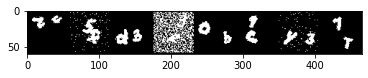

number: [4], letter: [25]
number: [5], letter: [5]
number: [3], letter: [3]
number: [3], letter: [17]
number: [0], letter: [1]
number: [9], letter: [2]
number: [3], letter: [24]
number: [7], letter: [19]
 None  None  None  None  None  None  None  None


In [7]:
import matplotlib.pyplot as plt
import torchvision
# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
# print(images)
# print(labels)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % convert_label(labels[j]) for j in range(8)))

In [14]:
# Define a convolutional neural network

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 128, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(128, 256, 3, padding=2)
        self.conv3 = nn.Conv2d(256, 256, 3, padding=2)
        self.fc1 = nn.Linear(256 * 8 * 8, 2048)
        self.fc2 = nn.Linear(2048, 2048)
        self.fc3 = nn.Linear(2048, 260)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 256 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [9]:
# Define a loss function and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [36]:
# test one set of images
# images and lables from image print cell
# zero the parameter gradients
optimizer.zero_grad()

# forward + backward + optimize
outputs = net(images.float())
loss = criterion(outputs, labels)
loss.backward()
optimizer.step()

_, predicted = torch.topk(outputs.data, 2)


In [46]:
print(loss)
print(torch.max(outputs.data, 1))
print(torch.topk(outputs.data, 2))
print(predicted)


tensor(3.5190, dtype=torch.float64, grad_fn=<DivBackward1>)
torch.return_types.max(
values=tensor([2.3293, 5.6581, 6.4258, 2.6210, 4.2366, 3.0611, 3.0667, 2.9228]),
indices=tensor([ 5,  8,  8,  4, 31,  7,  0,  7]))
torch.return_types.topk(
values=tensor([[2.3293, 2.3192],
        [5.6581, 5.5926],
        [6.4258, 6.1399],
        [2.6210, 2.4904],
        [4.2366, 3.8212],
        [3.0611, 2.9145],
        [3.0667, 1.9962],
        [2.9228, 2.5889]]),
indices=tensor([[ 5,  8],
        [ 8,  0],
        [ 8,  0],
        [ 4, 17],
        [31,  4],
        [ 7,  9],
        [ 0,  8],
        [ 7,  4]]))
tensor([ 5,  8,  8,  4, 31,  7,  0,  7])


In [ ]:
# Train the network

for epoch in range(5):  # loop over the dataset multiple times
    net = net.float()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 5000 == 4999:    # print every 5000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

In [11]:
print(list(net.parameters()))


[Parameter containing:
tensor([[[[-0.1041, -0.2589, -0.3449, -0.1564, -0.0764],
          [-0.1987, -0.0729, -0.1768, -0.1453, -0.2477],
          [-0.0254, -0.0415, -0.0135, -0.1699, -0.3293],
          [-0.0009,  0.1837,  0.1325, -0.0269, -0.2445],
          [ 0.0699,  0.1854,  0.1745,  0.1132, -0.1639]]],


        [[[ 0.0072,  0.1607,  0.1643,  0.0345,  0.0487],
          [ 0.0907,  0.2400,  0.1043, -0.0154, -0.0408],
          [ 0.0684,  0.1362,  0.0477,  0.0531, -0.0303],
          [-0.0637, -0.0224,  0.0036, -0.0290, -0.0133],
          [-0.1964, -0.1545, -0.0531,  0.0551, -0.0775]]],


        [[[ 0.1112,  0.0708, -0.0189, -0.4047, -0.5353],
          [ 0.0853,  0.0862,  0.1842, -0.4834,  0.1041],
          [ 0.0402,  0.0493,  0.0432, -0.4070, -0.1335],
          [-0.1735, -0.1003, -0.2647, -0.0349, -0.0328],
          [-0.4199, -0.1999, -0.1041, -0.0571, -0.0238]]],


        [[[-0.1481, -0.1955, -0.1532,  0.0662, -0.1958],
          [-0.0025, -0.1958, -0.0381, -0.0797,  0.039

In [42]:
testiter = iter(test_loader)
images, labels = next(testiter)
outputs = net(images.float())
print(outputs.data)
_, predicted = torch.max(outputs.data, 1)
print(predicted)
print(labels)

tensor([[ 2.2210e+00, -1.8898e+00,  1.2158e+00,  7.7104e-01,  1.8488e-02,
          2.3293e+00,  2.0164e+00,  3.0882e-01,  2.3192e+00,  6.3970e-01,
          8.6366e-01,  1.8212e+00,  1.6404e+00,  1.4976e+00,  1.4821e+00,
         -1.3483e+00,  3.8114e-01, -1.6205e+00, -1.8230e-01, -5.1070e-01,
         -2.0723e-01,  3.1268e-02, -6.2616e-01, -1.5642e+00,  5.8338e-01,
         -1.4573e+00,  1.1750e+00, -1.0089e+00,  9.8825e-01, -2.3029e+00,
         -1.1903e+00, -1.6734e+00, -9.8605e-01, -3.0247e+00, -2.0338e+00,
          9.0965e-01],
        [ 5.5926e+00, -5.0547e+00,  2.8808e+00,  1.0422e+00, -2.7740e+00,
          3.1502e+00,  1.6529e+00,  2.9559e-01,  5.6581e+00,  6.2952e-01,
          2.9980e+00,  3.8708e+00,  4.3522e+00,  1.2347e+00,  3.2811e+00,
          3.5854e-01,  3.6790e+00, -3.5118e+00,  1.4706e-01,  1.2288e-01,
         -3.5386e+00, -2.9873e+00, -1.4840e+00, -5.1687e+00,  4.2583e+00,
          1.6034e-01,  3.4237e+00,  3.5509e-01,  2.1000e+00, -2.7036e+00,
         -1.248

In [11]:
# Let's see how the network performs on the whole test dataset

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images.float())
        # _, predicted = torch.topk(outputs, 2)
        _, predicted = torch.max(outputs.data, 1)
        total += len(labels)
        correct += (predicted == labels).sum().item()


In [12]:
print(outputs.shape)
print(labels.shape)
print(total)
print(correct)

print('Accuracy of the network on the 5000 test images: %d %%' % (
    100 * correct / total))

torch.Size([8, 260])
torch.Size([8])
5000
1497
Accuracy of the network on the 5000 test images: 29 %
